<a href="https://colab.research.google.com/github/vdslab/VoronoiTreemapWordCloud/blob/main/voronoi_treemap_word_clouds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [3]:
!sudo apt update

Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,568 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://s

In [4]:
!sudo apt install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
make is already the newest version (4.1-9.1ubuntu1).
make set to manually installed.
curl is already the newest version (7.58.0-2ubuntu3.21).
git is already the newest version (1:2.17.1-1ubuntu0.13).
xz-utils is already the newest version (5.2.2-1.3ubuntu0.1).
xz-utils set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libmagic-mgc libmagic1 libmecab2 mecab-ipadic mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  file libmagic-mgc libmagic1 libmecab-dev libmecab2 mecab mecab-ipadic
  mecab-ipadic-utf8 mecab-jumandic mecab-jumandic-utf8 mecab-utils
0 upgraded, 11 newly installed, 0 to remove and 22 not upgraded.
Need to get 29.3 MB of archives.
After this operation, 282 MB of ad

In [5]:
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git

Cloning into 'mecab-ipadic-neologd'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 75 (delta 5), reused 54 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), done.


In [6]:
!mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n -y

[install-mecab-ipadic-NEologd] : Start..
[install-mecab-ipadic-NEologd] : Check the existance of libraries
[install-mecab-ipadic-NEologd] :     find => ok
[install-mecab-ipadic-NEologd] :     sort => ok
[install-mecab-ipadic-NEologd] :     head => ok
[install-mecab-ipadic-NEologd] :     cut => ok
[install-mecab-ipadic-NEologd] :     egrep => ok
[install-mecab-ipadic-NEologd] :     mecab => ok
[install-mecab-ipadic-NEologd] :     mecab-config => ok
[install-mecab-ipadic-NEologd] :     make => ok
[install-mecab-ipadic-NEologd] :     curl => ok
[install-mecab-ipadic-NEologd] :     sed => ok
[install-mecab-ipadic-NEologd] :     cat => ok
[install-mecab-ipadic-NEologd] :     diff => ok
[install-mecab-ipadic-NEologd] :     tar => ok
[install-mecab-ipadic-NEologd] :     unxz => ok
[install-mecab-ipadic-NEologd] :     xargs => ok
[install-mecab-ipadic-NEologd] :     grep => ok
[install-mecab-ipadic-NEologd] :     iconv => ok
[install-mecab-ipadic-NEologd] :     patch => ok
[install-mecab-ipadi

In [7]:
!pip install mecab-python3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 577 kB 6.5 MB/s 


In [8]:
!pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!curl -O http://public.shiroyagi.s3.amazonaws.com/latest-ja-word2vec-gensim-model.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  126M  100  126M    0     0  21.1M      0  0:00:05  0:00:05 --:--:-- 25.9M


In [10]:
!unzip latest-ja-word2vec-gensim-model.zip

Archive:  latest-ja-word2vec-gensim-model.zip
  inflating: word2vec.gensim.model   
  inflating: word2vec.gensim.model.syn1neg.npy  
  inflating: word2vec.gensim.model.wv.syn0.npy  


In [11]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# JP Word2Vec Distance Matrix

In [12]:
from gensim.models.word2vec import Word2Vec

model_path = 'word2vec.gensim.model'
model = Word2Vec.load(model_path)

KeyboardInterrupt: ignored

In [ ]:
text = '''メロスは激怒した。必ず、かの邪智暴虐の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。
「王様は、人を殺します。」
「なぜ殺すのだ。」
「悪心を抱いている、というのですが、誰もそんな、悪心を持っては居りませぬ。」
「たくさんの人を殺したのか。」
「はい、はじめは王様の妹婿さまを。それから、御自身のお世嗣を。それから、妹さまを。それから、妹さまの御子さまを。それから、皇后さまを。それから、賢臣のアレキス様を。」
「おどろいた。国王は乱心か。」
「いいえ、乱心ではございませぬ。人を、信ずる事が出来ぬ、というのです。このごろは、臣下の心をも、お疑いになり、少しく派手な暮しをしている者には、人質ひとりずつ差し出すことを命じて居ります。御命令を拒めば十字架にかけられて、殺されます。きょうは、六人殺されました。」
　聞いて、メロスは激怒した。「呆れた王だ。生かして置けぬ。」
　メロスは、単純な男であった。買い物を、背負ったままで、のそのそ王城にはいって行った。たちまち彼は、巡邏の警吏に捕縛された。調べられて、メロスの懐中からは短剣が出て来たので、騒ぎが大きくなってしまった。メロスは、王の前に引き出された。
「この短刀で何をするつもりであったか。言え！」暴君ディオニスは静かに、けれども威厳を以て問いつめた。その王の顔は蒼白で、眉間の皺は、刻み込まれたように深かった。
「市を暴君の手から救うのだ。」とメロスは悪びれずに答えた。
「おまえがか？」王は、憫笑した。「仕方の無いやつじゃ。おまえには、わしの孤独がわからぬ。」
「言うな！」とメロスは、いきり立って反駁した。「人の心を疑うのは、最も恥ずべき悪徳だ。王は、民の忠誠をさえ疑って居られる。」
「疑うのが、正当の心構えなのだと、わしに教えてくれたのは、おまえたちだ。人の心は、あてにならない。人間は、もともと私慾のかたまりさ。信じては、ならぬ。」暴君は落着いて呟き、ほっと溜息をついた。「わしだって、平和を望んでいるのだが。」
「なんの為の平和だ。自分の地位を守る為か。」こんどはメロスが嘲笑した。「罪の無い人を殺して、何が平和だ。」
「だまれ、下賤の者。」王は、さっと顔を挙げて報いた。「口では、どんな清らかな事でも言える。わしには、人の腹綿の奥底が見え透いてならぬ。おまえだって、いまに、磔になってから、泣いて詫びたって聞かぬぞ。」
「ああ、王は悧巧だ。自惚れているがよい。私は、ちゃんと死ぬる覚悟で居るのに。命乞いなど決してしない。ただ、――」と言いかけて、メロスは足もとに視線を落し瞬時ためらい、「ただ、私に情をかけたいつもりなら、処刑までに三日間の日限を与えて下さい。たった一人の妹に、亭主を持たせてやりたいのです。三日のうちに、私は村で結婚式を挙げさせ、必ず、ここへ帰って来ます。」
「ばかな。」と暴君は、嗄れた声で低く笑った。「とんでもない嘘を言うわい。逃がした小鳥が帰って来るというのか。」
「そうです。帰って来るのです。」メロスは必死で言い張った。「私は約束を守ります。私を、三日間だけ許して下さい。妹が、私の帰りを待っているのだ。そんなに私を信じられないならば、よろしい、この市にセリヌンティウスという石工がいます。私の無二の友人だ。あれを、人質としてここに置いて行こう。私が逃げてしまって、三日目の日暮まで、ここに帰って来なかったら、あの友人を絞め殺して下さい。たのむ、そうして下さい。」
　それを聞いて王は、残虐な気持で、そっと北叟笑んだ。生意気なことを言うわい。どうせ帰って来ないにきまっている。この嘘つきに騙された振りして、放してやるのも面白い。そうして身代りの男を、三日目に殺してやるのも気味がいい。人は、これだから信じられぬと、わしは悲しい顔して、その身代りの男を磔刑に処してやるのだ。世の中の、正直者とかいう奴輩にうんと見せつけてやりたいものさ。
「願いを、聞いた。その身代りを呼ぶがよい。三日目には日没までに帰って来い。おくれたら、その身代りを、きっと殺すぞ。ちょっとおくれて来るがいい。おまえの罪は、永遠にゆるしてやろうぞ。」
「なに、何をおっしゃる。」
「はは。いのちが大事だったら、おくれて来い。おまえの心は、わかっているぞ。」
　メロスは口惜しく、地団駄踏んだ。ものも言いたくなくなった。
　竹馬の友、セリヌンティウスは、深夜、王城に召された。暴君ディオニスの面前で、佳き友と佳き友は、二年ぶりで相逢うた。メロスは、友に一切の事情を語った。セリヌンティウスは無言で首肯き、メロスをひしと抱きしめた。友と友の間は、それでよかった。セリヌンティウスは、縄打たれた。メロスは、すぐに出発した。初夏、満天の星である。
　メロスはその夜、一睡もせず十里の路を急ぎに急いで、村へ到着したのは、翌る日の午前、陽は既に高く昇って、村人たちは野に出て仕事をはじめていた。メロスの十六の妹も、きょうは兄の代りに羊群の番をしていた。よろめいて歩いて来る兄の、疲労困憊の姿を見つけて驚いた。そうして、うるさく兄に質問を浴びせた。
「なんでも無い。」メロスは無理に笑おうと努めた。「市に用事を残して来た。またすぐ市に行かなければならぬ。あす、おまえの結婚式を挙げる。早いほうがよかろう。」
　妹は頬をあからめた。
「うれしいか。綺麗な衣裳も買って来た。さあ、これから行って、村の人たちに知らせて来い。結婚式は、あすだと。」
　メロスは、また、よろよろと歩き出し、家へ帰って神々の祭壇を飾り、祝宴の席を調え、間もなく床に倒れ伏し、呼吸もせぬくらいの深い眠りに落ちてしまった。
　眼が覚めたのは夜だった。メロスは起きてすぐ、花婿の家を訪れた。そうして、少し事情があるから、結婚式を明日にしてくれ、と頼んだ。婿の牧人は驚き、それはいけない、こちらには未だ何の仕度も出来ていない、葡萄の季節まで待ってくれ、と答えた。メロスは、待つことは出来ぬ、どうか明日にしてくれ給え、と更に押してたのんだ。婿の牧人も頑強であった。なかなか承諾してくれない。夜明けまで議論をつづけて、やっと、どうにか婿をなだめ、すかして、説き伏せた。結婚式は、真昼に行われた。新郎新婦の、神々への宣誓が済んだころ、黒雲が空を覆い、ぽつりぽつり雨が降り出し、やがて車軸を流すような大雨となった。祝宴に列席していた村人たちは、何か不吉なものを感じたが、それでも、めいめい気持を引きたて、狭い家の中で、むんむん蒸し暑いのも怺え、陽気に歌をうたい、手を拍った。メロスも、満面に喜色を湛え、しばらくは、王とのあの約束をさえ忘れていた。祝宴は、夜に入っていよいよ乱れ華やかになり、人々は、外の豪雨を全く気にしなくなった。メロスは、一生このままここにいたい、と思った。この佳い人たちと生涯暮して行きたいと願ったが、いまは、自分のからだで、自分のものでは無い。ままならぬ事である。メロスは、わが身に鞭打ち、ついに出発を決意した。あすの日没までには、まだ十分の時が在る。ちょっと一眠りして、それからすぐに出発しよう、と考えた。その頃には、雨も小降りになっていよう。少しでも永くこの家に愚図愚図とどまっていたかった。メロスほどの男にも、やはり未練の情というものは在る。今宵呆然、歓喜に酔っているらしい花嫁に近寄り、
「おめでとう。私は疲れてしまったから、ちょっとご免こうむって眠りたい。眼が覚めたら、すぐに市に出かける。大切な用事があるのだ。私がいなくても、もうおまえには優しい亭主があるのだから、決して寂しい事は無い。おまえの兄の、一ばんきらいなものは、人を疑う事と、それから、嘘をつく事だ。おまえも、それは、知っているね。亭主との間に、どんな秘密でも作ってはならぬ。おまえに言いたいのは、それだけだ。おまえの兄は、たぶん偉い男なのだから、おまえもその誇りを持っていろ。」
　花嫁は、夢見心地で首肯いた。メロスは、それから花婿の肩をたたいて、
「仕度の無いのはお互さまさ。私の家にも、宝といっては、妹と羊だけだ。他には、何も無い。全部あげよう。もう一つ、メロスの弟になったことを誇ってくれ。」
　花婿は揉み手して、てれていた。メロスは笑って村人たちにも会釈して、宴席から立ち去り、羊小屋にもぐり込んで、死んだように深く眠った。
　眼が覚めたのは翌る日の薄明の頃である。メロスは跳ね起き、南無三、寝過したか、いや、まだまだ大丈夫、これからすぐに出発すれば、約束の刻限までには十分間に合う。きょうは是非とも、あの王に、人の信実の存するところを見せてやろう。そうして笑って磔の台に上ってやる。メロスは、悠々と身仕度をはじめた。雨も、いくぶん小降りになっている様子である。身仕度は出来た。さて、メロスは、ぶるんと両腕を大きく振って、雨中、矢の如く走り出た。
　私は、今宵、殺される。殺される為に走るのだ。身代りの友を救う為に走るのだ。王の奸佞邪智を打ち破る為に走るのだ。走らなければならぬ。そうして、私は殺される。若い時から名誉を守れ。さらば、ふるさと。若いメロスは、つらかった。幾度か、立ちどまりそうになった。えい、えいと大声挙げて自身を叱りながら走った。村を出て、野を横切り、森をくぐり抜け、隣村に着いた頃には、雨も止み、日は高く昇って、そろそろ暑くなって来た。メロスは額の汗をこぶしで払い、ここまで来れば大丈夫、もはや故郷への未練は無い。妹たちは、きっと佳い夫婦になるだろう。私には、いま、なんの気がかりも無い筈だ。まっすぐに王城に行き着けば、それでよいのだ。そんなに急ぐ必要も無い。ゆっくり歩こう、と持ちまえの呑気さを取り返し、好きな小歌をいい声で歌い出した。ぶらぶら歩いて二里行き三里行き、そろそろ全里程の半ばに到達した頃、降って湧いた災難、メロスの足は、はたと、とまった。見よ、前方の川を。きのうの豪雨で山の水源地は氾濫し、濁流滔々と下流に集り、猛勢一挙に橋を破壊し、どうどうと響きをあげる激流が、木葉微塵に橋桁を跳ね飛ばしていた。彼は茫然と、立ちすくんだ。あちこちと眺めまわし、また、声を限りに呼びたててみたが、繋舟は残らず浪に浚われて影なく、渡守りの姿も見えない。流れはいよいよ、ふくれ上り、海のようになっている。メロスは川岸にうずくまり、男泣きに泣きながらゼウスに手を挙げて哀願した。「ああ、鎮めたまえ、荒れ狂う流れを！　時は刻々に過ぎて行きます。太陽も既に真昼時です。あれが沈んでしまわぬうちに、王城に行き着くことが出来なかったら、あの佳い友達が、私のために死ぬのです。」
　濁流は、メロスの叫びをせせら笑う如く、ますます激しく躍り狂う。浪は浪を呑み、捲き、煽り立て、そうして時は、刻一刻と消えて行く。今はメロスも覚悟した。泳ぎ切るより他に無い。ああ、神々も照覧あれ！　濁流にも負けぬ愛と誠の偉大な力を、いまこそ発揮して見せる。メロスは、ざんぶと流れに飛び込み、百匹の大蛇のようにのた打ち荒れ狂う浪を相手に、必死の闘争を開始した。満身の力を腕にこめて、押し寄せ渦巻き引きずる流れを、なんのこれしきと掻きわけ掻きわけ、めくらめっぽう獅子奮迅の人の子の姿には、神も哀れと思ったか、ついに憐愍を垂れてくれた。押し流されつつも、見事、対岸の樹木の幹に、すがりつく事が出来たのである。ありがたい。メロスは馬のように大きな胴震いを一つして、すぐにまた先きを急いだ。一刻といえども、むだには出来ない。陽は既に西に傾きかけている。ぜいぜい荒い呼吸をしながら峠をのぼり、のぼり切って、ほっとした時、突然、目の前に一隊の山賊が躍り出た。
「待て。」
「何をするのだ。私は陽の沈まぬうちに王城へ行かなければならぬ。放せ。」
「どっこい放さぬ。持ちもの全部を置いて行け。」
「私にはいのちの他には何も無い。その、たった一つの命も、これから王にくれてやるのだ。」
「その、いのちが欲しいのだ。」
「さては、王の命令で、ここで私を待ち伏せしていたのだな。」
　山賊たちは、ものも言わず一斉に棍棒を振り挙げた。メロスはひょいと、からだを折り曲げ、飛鳥の如く身近かの一人に襲いかかり、その棍棒を奪い取って、
「気の毒だが正義のためだ！」と猛然一撃、たちまち、三人を殴り倒し、残る者のひるむ隙に、さっさと走って峠を下った。一気に峠を駈け降りたが、流石に疲労し、折から午後の灼熱の太陽がまともに、かっと照って来て、メロスは幾度となく眩暈を感じ、これではならぬ、と気を取り直しては、よろよろ二、三歩あるいて、ついに、がくりと膝を折った。立ち上る事が出来ぬのだ。天を仰いで、くやし泣きに泣き出した。ああ、あ、濁流を泳ぎ切り、山賊を三人も撃ち倒し韋駄天、ここまで突破して来たメロスよ。真の勇者、メロスよ。今、ここで、疲れ切って動けなくなるとは情無い。愛する友は、おまえを信じたばかりに、やがて殺されなければならぬ。おまえは、稀代の不信の人間、まさしく王の思う壺だぞ、と自分を叱ってみるのだが、全身萎えて、もはや芋虫ほどにも前進かなわぬ。路傍の草原にごろりと寝ころがった。身体疲労すれば、精神も共にやられる。もう、どうでもいいという、勇者に不似合いな不貞腐れた根性が、心の隅に巣喰った。私は、これほど努力したのだ。約束を破る心は、みじんも無かった。神も照覧、私は精一ぱいに努めて来たのだ。動けなくなるまで走って来たのだ。私は不信の徒では無い。ああ、できる事なら私の胸を截ち割って、真紅の心臓をお目に掛けたい。愛と信実の血液だけで動いているこの心臓を見せてやりたい。けれども私は、この大事な時に、精も根も尽きたのだ。私は、よくよく不幸な男だ。私は、きっと笑われる。私の一家も笑われる。私は友を欺いた。中途で倒れるのは、はじめから何もしないのと同じ事だ。ああ、もう、どうでもいい。これが、私の定った運命なのかも知れない。セリヌンティウスよ、ゆるしてくれ。君は、いつでも私を信じた。私も君を、欺かなかった。私たちは、本当に佳い友と友であったのだ。いちどだって、暗い疑惑の雲を、お互い胸に宿したことは無かった。いまだって、君は私を無心に待っているだろう。ああ、待っているだろう。ありがとう、セリヌンティウス。よくも私を信じてくれた。それを思えば、たまらない。友と友の間の信実は、この世で一ばん誇るべき宝なのだからな。セリヌンティウス、私は走ったのだ。君を欺くつもりは、みじんも無かった。信じてくれ！　私は急ぎに急いでここまで来たのだ。濁流を突破した。山賊の囲みからも、するりと抜けて一気に峠を駈け降りて来たのだ。私だから、出来たのだよ。ああ、この上、私に望み給うな。放って置いてくれ。どうでも、いいのだ。私は負けたのだ。だらしが無い。笑ってくれ。王は私に、ちょっとおくれて来い、と耳打ちした。おくれたら、身代りを殺して、私を助けてくれると約束した。私は王の卑劣を憎んだ。けれども、今になってみると、私は王の言うままになっている。私は、おくれて行くだろう。王は、ひとり合点して私を笑い、そうして事も無く私を放免するだろう。そうなったら、私は、死ぬよりつらい。私は、永遠に裏切者だ。地上で最も、不名誉の人種だ。セリヌンティウスよ、私も死ぬぞ。君と一緒に死なせてくれ。君だけは私を信じてくれるにちがい無い。いや、それも私の、ひとりよがりか？　ああ、もういっそ、悪徳者として生き伸びてやろうか。村には私の家が在る。羊も居る。妹夫婦は、まさか私を村から追い出すような事はしないだろう。正義だの、信実だの、愛だの、考えてみれば、くだらない。人を殺して自分が生きる。それが人間世界の定法ではなかったか。ああ、何もかも、ばかばかしい。私は、醜い裏切り者だ。どうとも、勝手にするがよい。やんぬる哉。――四肢を投げ出して、うとうと、まどろんでしまった。
　ふと耳に、潺々、水の流れる音が聞えた。そっと頭をもたげ、息を呑んで耳をすました。すぐ足もとで、水が流れているらしい。よろよろ起き上って、見ると、岩の裂目から滾々と、何か小さく囁きながら清水が湧き出ているのである。その泉に吸い込まれるようにメロスは身をかがめた。水を両手で掬って、一くち飲んだ。ほうと長い溜息が出て、夢から覚めたような気がした。歩ける。行こう。肉体の疲労恢復と共に、わずかながら希望が生れた。義務遂行の希望である。わが身を殺して、名誉を守る希望である。斜陽は赤い光を、樹々の葉に投じ、葉も枝も燃えるばかりに輝いている。日没までには、まだ間がある。私を、待っている人があるのだ。少しも疑わず、静かに期待してくれている人があるのだ。私は、信じられている。私の命なぞは、問題ではない。死んでお詫び、などと気のいい事は言って居られぬ。私は、信頼に報いなければならぬ。いまはただその一事だ。走れ！　メロス。
　私は信頼されている。私は信頼されている。先刻の、あの悪魔の囁きは、あれは夢だ。悪い夢だ。忘れてしまえ。五臓が疲れているときは、ふいとあんな悪い夢を見るものだ。メロス、おまえの恥ではない。やはり、おまえは真の勇者だ。再び立って走れるようになったではないか。ありがたい！　私は、正義の士として死ぬ事が出来るぞ。ああ、陽が沈む。ずんずん沈む。待ってくれ、ゼウスよ。私は生れた時から正直な男であった。正直な男のままにして死なせて下さい。
　路行く人を押しのけ、跳ねとばし、メロスは黒い風のように走った。野原で酒宴の、その宴席のまっただ中を駈け抜け、酒宴の人たちを仰天させ、犬を蹴とばし、小川を飛び越え、少しずつ沈んでゆく太陽の、十倍も早く走った。一団の旅人と颯っとすれちがった瞬間、不吉な会話を小耳にはさんだ。「いまごろは、あの男も、磔にかかっているよ。」ああ、その男、その男のために私は、いまこんなに走っているのだ。その男を死なせてはならない。急げ、メロス。おくれてはならぬ。愛と誠の力を、いまこそ知らせてやるがよい。風態なんかは、どうでもいい。メロスは、いまは、ほとんど全裸体であった。呼吸も出来ず、二度、三度、口から血が噴き出た。見える。はるか向うに小さく、シラクスの市の塔楼が見える。塔楼は、夕陽を受けてきらきら光っている。
「ああ、メロス様。」うめくような声が、風と共に聞えた。
「誰だ。」メロスは走りながら尋ねた。
「フィロストラトスでございます。貴方のお友達セリヌンティウス様の弟子でございます。」その若い石工も、メロスの後について走りながら叫んだ。「もう、駄目でございます。むだでございます。走るのは、やめて下さい。もう、あの方をお助けになることは出来ません。」
「いや、まだ陽は沈まぬ。」
「ちょうど今、あの方が死刑になるところです。ああ、あなたは遅かった。おうらみ申します。ほんの少し、もうちょっとでも、早かったなら！」
「いや、まだ陽は沈まぬ。」メロスは胸の張り裂ける思いで、赤く大きい夕陽ばかりを見つめていた。走るより他は無い。
「やめて下さい。走るのは、やめて下さい。いまはご自分のお命が大事です。あの方は、あなたを信じて居りました。刑場に引き出されても、平気でいました。王様が、さんざんあの方をからかっても、メロスは来ます、とだけ答え、強い信念を持ちつづけている様子でございました。」
「それだから、走るのだ。信じられているから走るのだ。間に合う、間に合わぬは問題でないのだ。人の命も問題でないのだ。私は、なんだか、もっと恐ろしく大きいものの為に走っているのだ。ついて来い！　フィロストラトス。」
「ああ、あなたは気が狂ったか。それでは、うんと走るがいい。ひょっとしたら、間に合わぬものでもない。走るがいい。」
　言うにや及ぶ。まだ陽は沈まぬ。最後の死力を尽して、メロスは走った。メロスの頭は、からっぽだ。何一つ考えていない。ただ、わけのわからぬ大きな力にひきずられて走った。陽は、ゆらゆら地平線に没し、まさに最後の一片の残光も、消えようとした時、メロスは疾風の如く刑場に突入した。間に合った。
「待て。その人を殺してはならぬ。メロスが帰って来た。約束のとおり、いま、帰って来た。」と大声で刑場の群衆にむかって叫んだつもりであったが、喉がつぶれて嗄れた声が幽かに出たばかり、群衆は、ひとりとして彼の到着に気がつかない。すでに磔の柱が高々と立てられ、縄を打たれたセリヌンティウスは、徐々に釣り上げられてゆく。メロスはそれを目撃して最後の勇、先刻、濁流を泳いだように群衆を掻きわけ、掻きわけ、
「私だ、刑吏！　殺されるのは、私だ。メロスだ。彼を人質にした私は、ここにいる！」と、かすれた声で精一ぱいに叫びながら、ついに磔台に昇り、釣り上げられてゆく友の両足に、齧りついた。群衆は、どよめいた。あっぱれ。ゆるせ、と口々にわめいた。セリヌンティウスの縄は、ほどかれたのである。
「セリヌンティウス。」メロスは眼に涙を浮べて言った。「私を殴れ。ちから一ぱいに頬を殴れ。私は、途中で一度、悪い夢を見た。君が若し私を殴ってくれなかったら、私は君と抱擁する資格さえ無いのだ。殴れ。」
　セリヌンティウスは、すべてを察した様子で首肯き、刑場一ぱいに鳴り響くほど音高くメロスの右頬を殴った。殴ってから優しく微笑み、
「メロス、私を殴れ。同じくらい音高く私の頬を殴れ。私はこの三日の間、たった一度だけ、ちらと君を疑った。生れて、はじめて君を疑った。君が私を殴ってくれなければ、私は君と抱擁できない。」
　メロスは腕に唸りをつけてセリヌンティウスの頬を殴った。
「ありがとう、友よ。」二人同時に言い、ひしと抱き合い、それから嬉し泣きにおいおい声を放って泣いた。
　群衆の中からも、歔欷の声が聞えた。暴君ディオニスは、群衆の背後から二人の様を、まじまじと見つめていたが、やがて静かに二人に近づき、顔をあからめて、こう言った。
「おまえらの望みは叶ったぞ。おまえらは、わしの心に勝ったのだ。信実とは、決して空虚な妄想ではなかった。どうか、わしをも仲間に入れてくれまいか。どうか、わしの願いを聞き入れて、おまえらの仲間の一人にしてほしい。」
　どっと群衆の間に、歓声が起った。
「万歳、王様万歳。」
　ひとりの少女が、緋のマントをメロスに捧げた。メロスは、まごついた。佳き友は、気をきかせて教えてやった。
「メロス、君は、まっぱだかじゃないか。早くそのマントを着るがいい。この可愛い娘さんは、メロスの裸体を、皆に見られるのが、たまらなく口惜しいのだ。」
　勇者は、ひどく赤面した。'''

In [ ]:
import MeCab
mecab = MeCab.Tagger('-r /etc/mecabrc -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')
mecab.parse('')
word_count = {}
ignore = {
    '*',
    'の',
    'する',
    'いる',
    'なる',
    'れる',
}
for row in text.split():
    node = mecab.parseToNode(row)
    while node.next:
        features = node.feature.split(',')
        word = features[6]
        if features[0] in ['動詞', '名詞', '形容詞'] and word not in ignore:
            if word not in word_count:
                word_count[word] = 0
            word_count[word] += 1
        node = node.next

In [ ]:
words = sorted(word_count.items(), key=lambda row: row[1], reverse=True)
words = [word for word, count in words if count > 1 and word in model.wv]

In [ ]:
from scipy.spatial.distance import pdist, squareform

word_vectors = [model.wv[word] for word in words]
distance_matrix = squareform(pdist(word_vectors))

In [ ]:
import itertools
import networkx as nx

graph = nx.Graph()
indices = list(range(len(words)))
for i in indices:
    graph.add_node(i)
for i, j in itertools.combinations(indices, 2):
    if distance_matrix[i, j] < 1:
        graph.add_edge(i, j, weight=distance_matrix[i, j])
print(graph.number_of_nodes(), graph.number_of_edges())

In [ ]:
nx.draw_kamada_kawai(graph)

# EN Word2Vec Distance Matrix

In [39]:
import gensim.downloader
model = gensim.downloader.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [85]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [13]:
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

In [14]:
url = "https://docs.google.com/spreadsheets/d/1_3E1dqyoYrR9D7CZfOuQbvKb68gFedn5zTvpWXvu8-o/edit#gid=2041917285"
ss = gc.open_by_url(url)
print(ss.title)
st = ss.get_worksheet(0)
print(st.title)

IEEE VIS papers 1990-2021


In [ ]:
conferenceName = "Vis" #"InfoVis" or "Vis" or "VAST"
text = ""
list_of_dicts = st.get_all_records()
for r in list_of_dicts:
  if r['Conference'] == conferenceName:
    text += r["Abstract"]
print(text)

In [142]:
min_count = 149
distance_threshold = 0.85
metric = 'cosine' # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html

In [129]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
word_count = {}
for token, pos in nltk.pos_tag(nltk.word_tokenize(text)):
    word = None
    if pos.startswith('NN'):
        word = lemmatizer.lemmatize(token, 'n')
    elif pos.startswith('JJ'):
        word = lemmatizer.lemmatize(token, 'a')
    elif pos.startswith('VB'):
        word = lemmatizer.lemmatize(token, 'v')
    if word and word not in stopwords:
        if word not in word_count:
            word_count[word] = 0
        word_count[word] += 1

In [130]:
words = sorted(word_count.items(), key=lambda row: row[1], reverse=True)
words = [word for word, count in words if count >= min_count and word in model]
print(len(words))

140


In [131]:
from scipy.spatial.distance import pdist, squareform

word_vectors = [model[word] for word in words]
distance_matrix = squareform(pdist(word_vectors, metric))

In [144]:
import itertools
import networkx as nx

graph = nx.Graph()
indices = list(range(len(words)))
for i in indices:
    graph.add_node(i)
for i, j in itertools.combinations(indices, 2):
    if distance_matrix[i, j] <= distance_threshold:
        graph.add_edge(i, j, weight=distance_matrix[i, j])
print(graph.number_of_nodes(), graph.number_of_edges())

140 3176


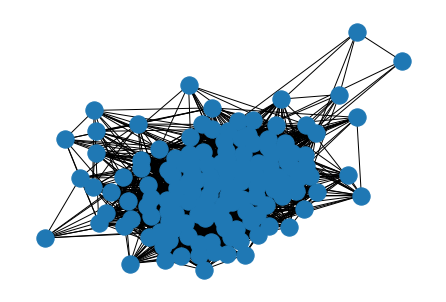

In [145]:
nx.draw(graph)

# Hierarchy Construction and Export

In [146]:
from community import community_louvain

dendrogram = community_louvain.generate_dendrogram(graph)
dendrogram.append({k: 0 for k in set(dendrogram[-1].values())})
for i, layer in enumerate(dendrogram):
    print(i)
    for (k, v) in sorted(layer.items()):
        print(f'  {i}-{k} {i + 1}-{v}')

0
  0-0 1-0
  0-1 1-0
  0-2 1-1
  0-3 1-0
  0-4 1-0
  0-5 1-0
  0-6 1-1
  0-7 1-0
  0-8 1-0
  0-9 1-2
  0-10 1-0
  0-11 1-2
  0-12 1-2
  0-13 1-0
  0-14 1-1
  0-15 1-1
  0-16 1-0
  0-17 1-1
  0-18 1-0
  0-19 1-0
  0-20 1-1
  0-21 1-0
  0-22 1-2
  0-23 1-2
  0-24 1-2
  0-25 1-2
  0-26 1-0
  0-27 1-1
  0-28 1-0
  0-29 1-1
  0-30 1-1
  0-31 1-1
  0-32 1-0
  0-33 1-0
  0-34 1-0
  0-35 1-2
  0-36 1-2
  0-37 1-1
  0-38 1-0
  0-39 1-0
  0-40 1-0
  0-41 1-1
  0-42 1-0
  0-43 1-0
  0-44 1-0
  0-45 1-0
  0-46 1-0
  0-47 1-0
  0-48 1-1
  0-49 1-2
  0-50 1-2
  0-51 1-1
  0-52 1-2
  0-53 1-1
  0-54 1-0
  0-55 1-0
  0-56 1-1
  0-57 1-0
  0-58 1-1
  0-59 1-0
  0-60 1-1
  0-61 1-0
  0-62 1-2
  0-63 1-0
  0-64 1-2
  0-65 1-1
  0-66 1-0
  0-67 1-2
  0-68 1-1
  0-69 1-2
  0-70 1-0
  0-71 1-2
  0-72 1-1
  0-73 1-1
  0-74 1-1
  0-75 1-1
  0-76 1-0
  0-77 1-0
  0-78 1-2
  0-79 1-2
  0-80 1-0
  0-81 1-0
  0-82 1-2
  0-83 1-0
  0-84 1-0
  0-85 1-0
  0-86 1-2
  0-87 1-2
  0-88 1-1
  0-89 1-0
  0-90 1-0
  0-91 

In [148]:
data = []
for i, layer in enumerate(dendrogram):
    for (k, v) in sorted(layer.items()):
        item = {
            'id': f'{i}-{k}',
            'parentId': f'{i + 1}-{v}',
        }
        if i == 0:
            item['word'] = words[k]
            item['weight'] = word_count[words[k]]
        data.append(item)
data.append({
    'id': f'{len(dendrogram)}-0',
    'parentId': None
})
data

[{'id': '0-0', 'parentId': '1-0', 'word': 'data', 'weight': 2384},
 {'id': '0-1', 'parentId': '1-0', 'word': 'visualization', 'weight': 1985},
 {'id': '0-2', 'parentId': '1-1', 'word': 'use', 'weight': 1831},
 {'id': '0-3', 'parentId': '1-0', 'word': 'technique', 'weight': 1128},
 {'id': '0-4', 'parentId': '1-0', 'word': 'method', 'weight': 1124},
 {'id': '0-5', 'parentId': '1-0', 'word': 'volume', 'weight': 941},
 {'id': '0-6', 'parentId': '1-1', 'word': 'present', 'weight': 931},
 {'id': '0-7', 'parentId': '1-0', 'word': 'surface', 'weight': 847},
 {'id': '0-8', 'parentId': '1-0', 'word': 'algorithm', 'weight': 829},
 {'id': '0-9', 'parentId': '1-2', 'word': 'system', 'weight': 794},
 {'id': '0-10', 'parentId': '1-0', 'word': 'model', 'weight': 779},
 {'id': '0-11', 'parentId': '1-2', 'word': 'field', 'weight': 733},
 {'id': '0-12', 'parentId': '1-2', 'word': 'approach', 'weight': 719},
 {'id': '0-13', 'parentId': '1-0', 'word': 'image', 'weight': 667},
 {'id': '0-14', 'parentId': '1

In [149]:
import json
filename = conferenceName+"-over"+str(min_count)+"count-"+'data.json'
print(filename)
with open(filename, 'w') as f:
    json.dump(data, f, ensure_ascii=False)

Vis-over149count-data.json
